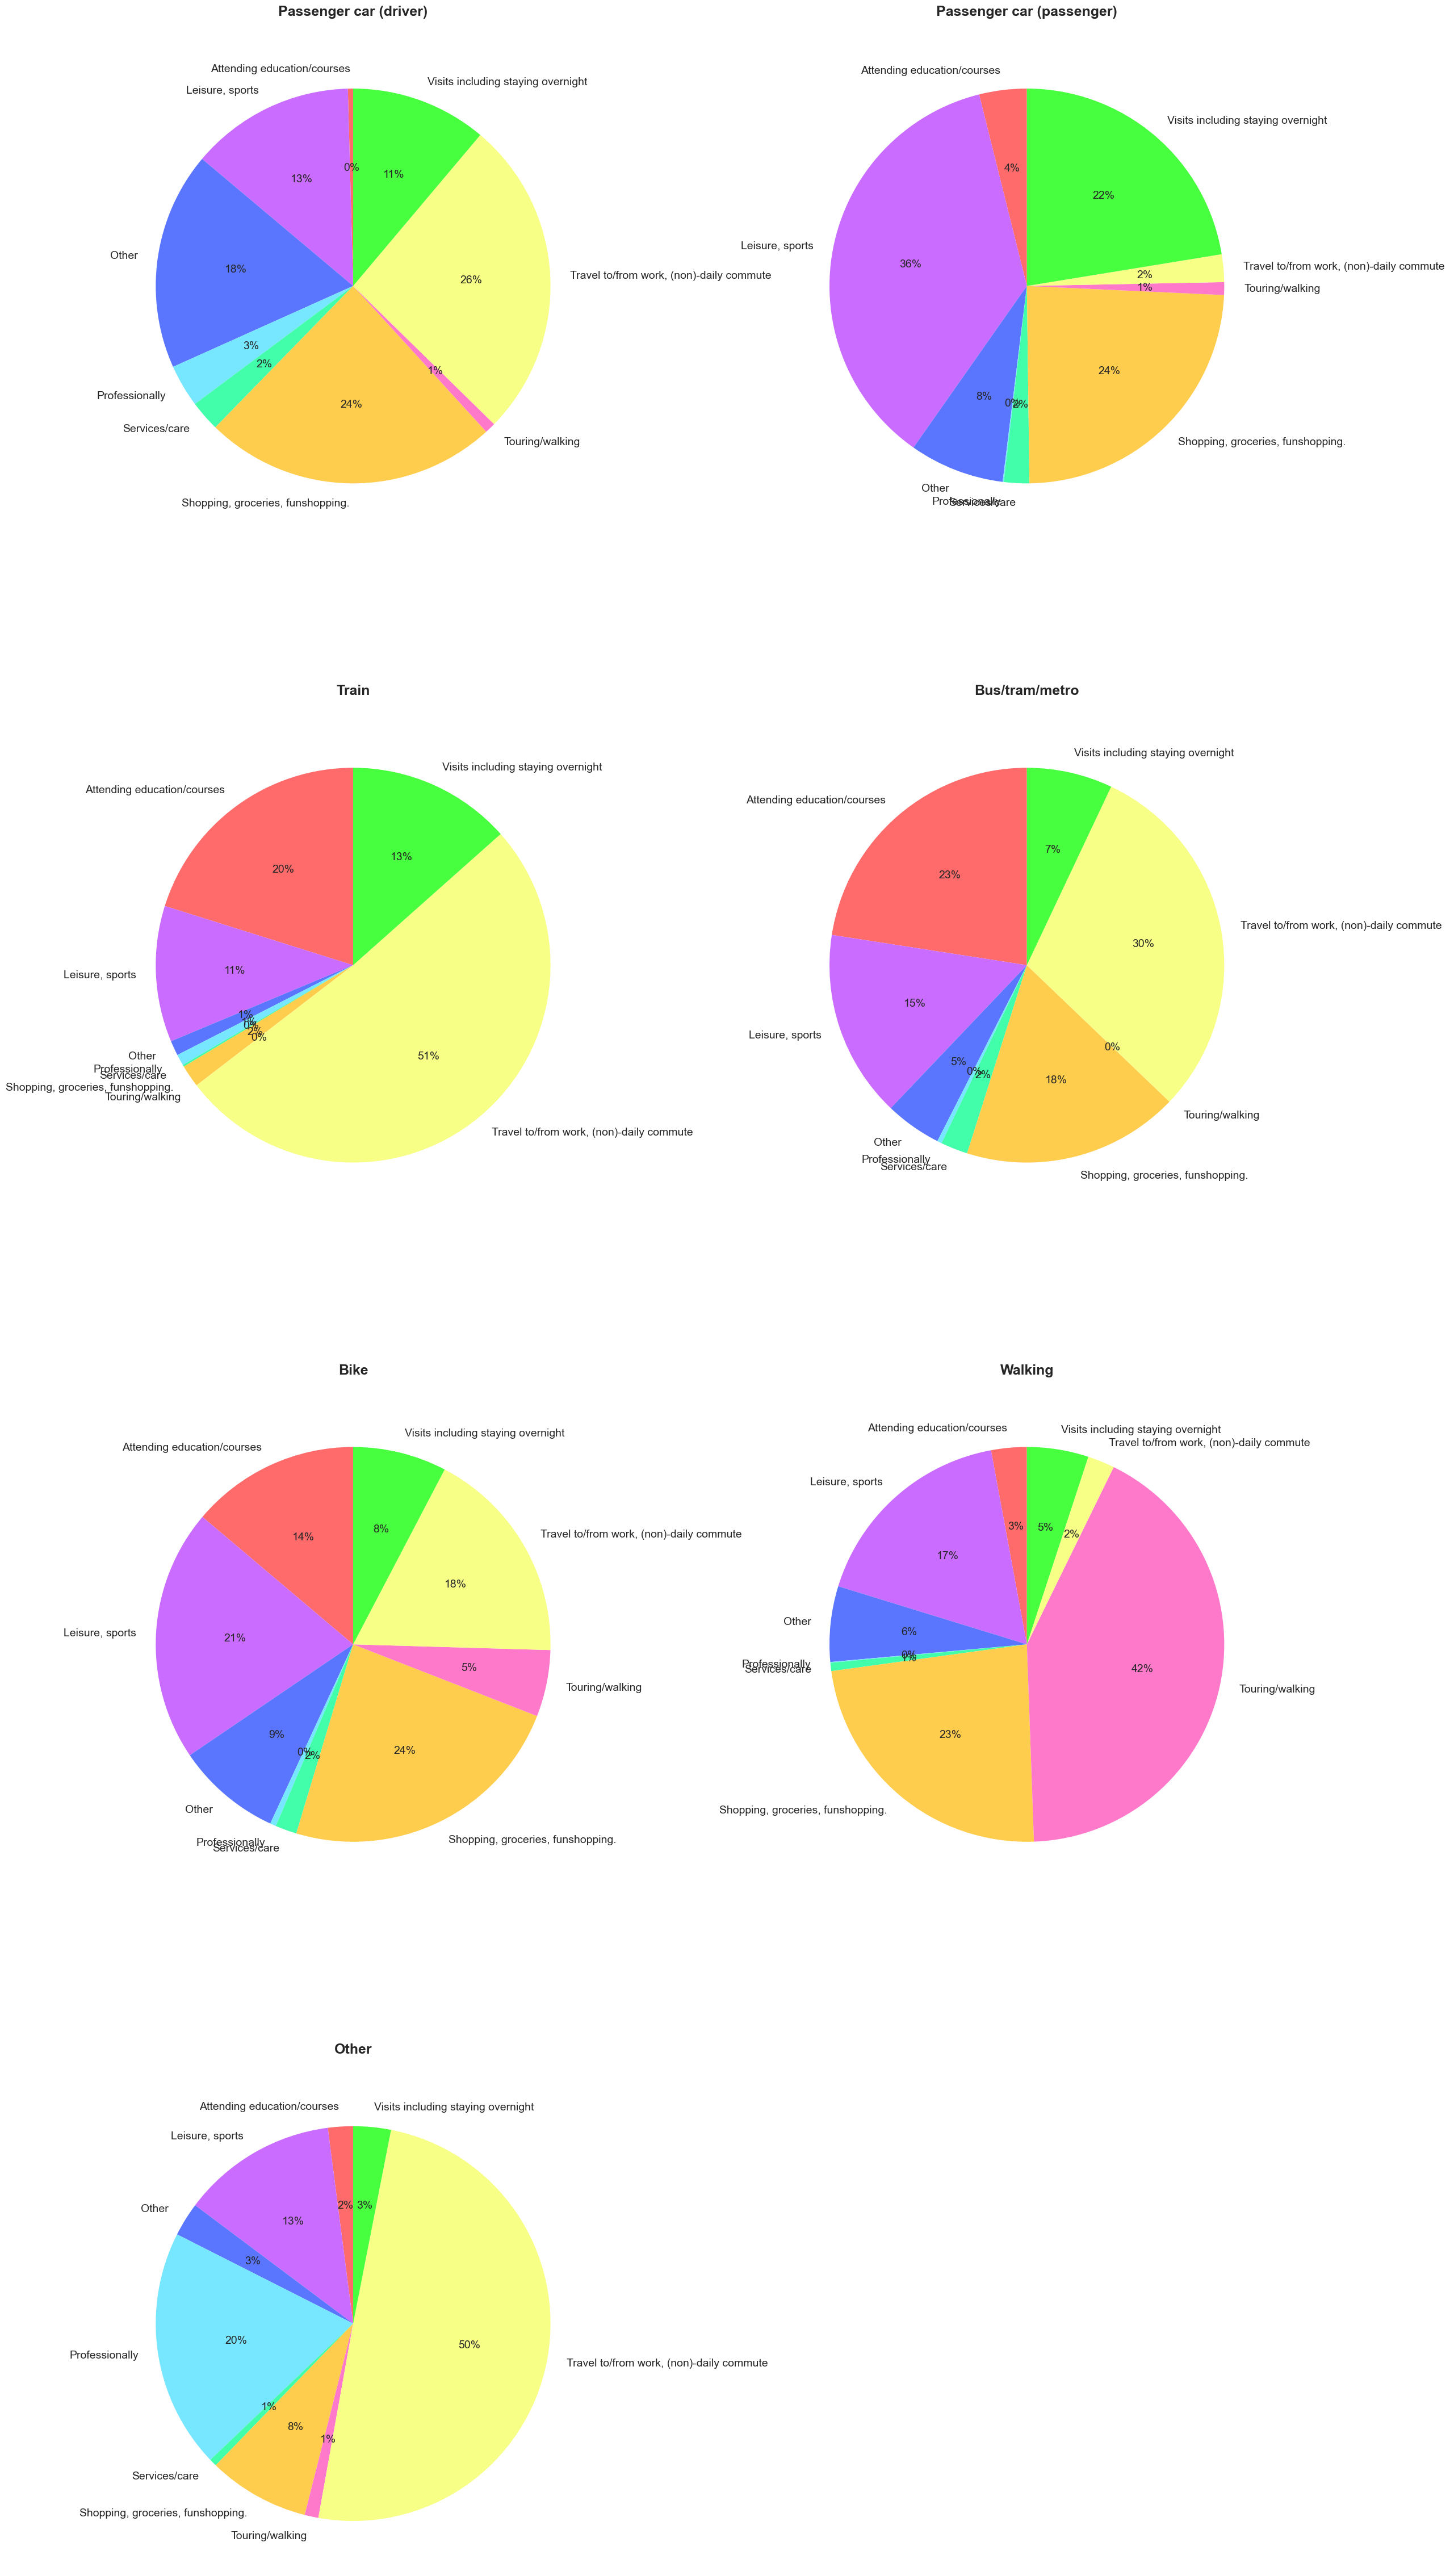

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
latest_year = df['Year'].max()
all_data = df[df['Year'] <= latest_year]
available_modes = [m for m in all_data['Travel modes'].unique() if m != 'Total']

# Layout - max 2 naast elkaar met extra grote charts
n_cols = 2
n_rows = (len(available_modes) + 1) // 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 12 * n_rows))

# Kleuren
colors = ['#FF6B6B',"#C96CFF", "#5A76FF", "#77E6FF", "#42FDA9", "#FFCD4E", "#FF79CA", "#F7FF87", "#47FF3E"]

for i, mode in enumerate(available_modes):
    if n_rows > 1:
        ax = axes[i//n_cols, i%n_cols]
    else:
        ax = axes[i]
    
    mode_data = all_data[all_data['Travel modes'] == mode]
    mode_data = mode_data[mode_data['Travel motives'] != 'Total']
    motive_distribution = mode_data.groupby('Travel motives')['Average number of trips per person per year'].sum()
    
    if len(motive_distribution) > 0:
        ax.pie(motive_distribution.values, 
               labels=motive_distribution.index,
               autopct='%1.0f%%',
               colors=colors[:len(motive_distribution)],
               startangle=90,
               textprops={'fontsize': 14})
        ax.set_title(mode, fontsize=18, fontweight='bold', pad=30)

# Verwijder lege subplots
for i in range(len(available_modes), n_rows * n_cols):
    if n_rows > 1:
        fig.delaxes(axes[i//n_cols, i%n_cols])
    else:
        fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()